# Predicting whether a comment on Twitter is Toxic with NLP and Machine Learning

By Victor Kiptoo


# 1. Project Background and Aim.
Twitter is social network platform where people have interaction and discussion about several issues affecting the society. It is a great platform to share and get information about what is going on around the globe. A platform with global reach comes with the problem of people using toxic and obscene language with the intention of abusing people hence a good platform is destroyed by a few bad apples. This project is aimed at recognizing obscene and toxic tweets using NLP and machine learning techniques. 

# 2. Data Description 
I got data from kaggle.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string


In [2]:
dataset = pd.read_csv("train.csv")
dataset.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
dataset.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159561,ffd2e85b07b3c7e4,"""\nNo he did not, read it again (I would have ...",0,0,0,0,0,0
159562,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [4]:
dataset.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
dataset.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
toxic,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
severe_toxic,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
obscene,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
insult,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
identity_hate,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


In [8]:
dataset.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [9]:
dataset

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


# Explanatory Data Analysis

In [10]:
#knowing the number of comments in each category
df_toxic = dataset.drop(columns = ['id', 'comment_text'])
df_toxic


,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [11]:
count = []
categories = list(df_toxic.columns.values)
for i in categories:
    count.append((i, df_toxic[i].sum()))


In [12]:
df_stats = pd.DataFrame(count, columns = ['category', 'no_of_comments'])
df_stats


,category,no_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


In [13]:
df_stats.value_counts()

category       no_of_comments
identity_hate  1405              1
insult         7877              1
obscene        8449              1
severe_toxic   1595              1
threat         478               1
toxic          15294             1
dtype: int64

Toxic labels



<Axes: ylabel='no_of_comments'>

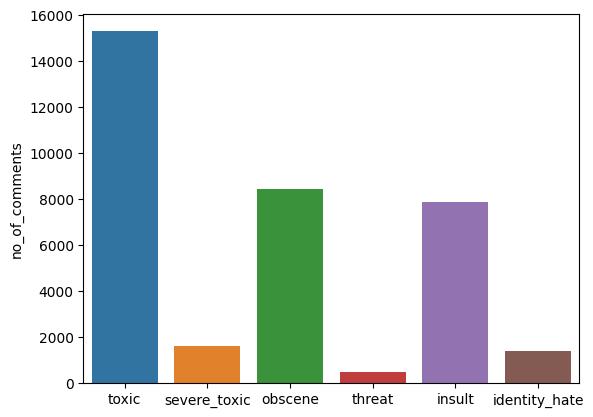

In [14]:
#getting count of each label 
category = list(df_stats.category)
category
sns.barplot(x = category, y = df_stats.no_of_comments, data=df_stats)

Whole dataset distribution

<Axes: >

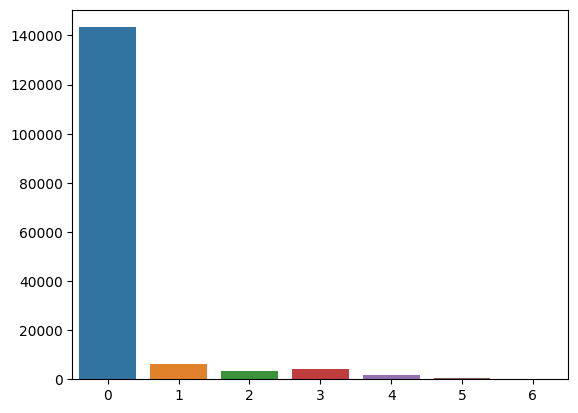

In [15]:
#getting the count of count of text occuring in eac
rowsums = dataset.iloc[:, 2:].sum(axis=1)
#rowsums

x = rowsums.value_counts()
sns.barplot(x = x.index, y=x.values)

This is a highly unbalanced dataset  because non-toxic comments are 140000 which is 89% of the dataset meaning accuracy as an evaluation metric is useless

Check for missing values 

In [16]:
dataset.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

# Data cleaning and preparation
This dataset has no missing values. But to prepare data for modelling, data has to be prepared because python doesn't understand the meaning of words can considers it as a string of characters. The following steps are done in this stage:
1. converting text to lower case using python function lower()
2. remove punctuation 
3. tokenize text
4. remove stopwords
5. Lemmatizing
6. Stemming


In [17]:
nltk.download()
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
nltk.download('punkt')
#from nltk.tokenize import TweetTokenizer
#from nltk import pos_tag


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
dataset['comment_text']=dataset['comment_text'].str.lower()
dataset

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::and for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [19]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
#TweetTokenizer
#pos_tag
#stopwords
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


In [21]:
#completing contractions
def replace_contraction(text):
  for contraction,  expanded in contractions.items():
        text = text.replace(contraction, expanded)
  return text



In [22]:
dataset['comment_text']=dataset['comment_text'].apply(replace_contraction)
dataset

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour I am ...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, I am really not trying to edit war. i...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nmore\ni cannot make any real suggestions on...",0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::and for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [23]:
#removing stopwords
def remove_stopwords(text):
    sw=set(stopwords)
    words=text.split()
    filtered_words=[word for word in words if word not in sw]
    return ''.join(filtered_words)

In [24]:
dataset['comment_text']=dataset['comment_text'].apply(remove_stopwords)

In [25]:
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanationeditsmadeusernamehardcoremetallicaf...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww!matchesbackgroundcolourIseeminglystuckwi...,0,0,0,0,0,0
2,000113f07ec002fd,"heyman,Ireallytryingeditwar./guyconstantlyremo...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""cannotmakerealsuggestionsimprovement-wondered...",0,0,0,0,0,0
4,0001d958c54c6e35,"you,sir,hero.chancerememberpage/on?",0,0,0,0,0,0


In [26]:
#removing punctuations
from nltk.tokenize import RegexpTokenizer
def remove_punctuation(text):
    tokenizer=RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text)
    cleaned_text=''.join(words)
    return cleaned_text

In [27]:
dataset['comment_text']=dataset['comment_text'].apply(remove_punctuation)

In [28]:
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanationeditsmadeusernamehardcoremetallicaf...,0,0,0,0,0,0
1,000103f0d9cfb60f,dawwmatchesbackgroundcolourIseeminglystuckwith...,0,0,0,0,0,0
2,000113f07ec002fd,heymanIreallytryingeditwarguyconstantlyremovin...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cannotmakerealsuggestionsimprovementwonderedse...,0,0,0,0,0,0
4,0001d958c54c6e35,yousirherochancerememberpageon,0,0,0,0,0,0


In [29]:
#lemmatizing
def lemmatize_text(text):
    words=text.split()
    lemmatized_words=[wn.lemmatize(word) for word in words]
    return ''.join(lemmatized_words)
    
    

In [30]:
dataset['comment_text']=dataset['comment_text'].apply(lemmatize_text)

In [31]:
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanationeditsmadeusernamehardcoremetallicaf...,0,0,0,0,0,0
1,000103f0d9cfb60f,dawwmatchesbackgroundcolourIseeminglystuckwith...,0,0,0,0,0,0
2,000113f07ec002fd,heymanIreallytryingeditwarguyconstantlyremovin...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cannotmakerealsuggestionsimprovementwonderedse...,0,0,0,0,0,0
4,0001d958c54c6e35,yousirherochancerememberpageon,0,0,0,0,0,0


In [32]:
#remove numbers and special characters
def remove_numbers_and_special_chars(text):
    cleaned_text=re.sub(r'[^a-zA-Z\s]','',text)
    return cleaned_text

In [33]:
dataset['comment_text']=dataset['comment_text'].apply(remove_numbers_and_special_chars)

In [34]:
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanationeditsmadeusernamehardcoremetallicaf...,0,0,0,0,0,0
1,000103f0d9cfb60f,dawwmatchesbackgroundcolourIseeminglystuckwith...,0,0,0,0,0,0
2,000113f07ec002fd,heymanIreallytryingeditwarguyconstantlyremovin...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cannotmakerealsuggestionsimprovementwonderedse...,0,0,0,0,0,0
4,0001d958c54c6e35,yousirherochancerememberpageon,0,0,0,0,0,0


In [35]:
#separate the words 
dataset['comment_text']=dataset['comment_text'].str.split()
dataset['comment_text']=dataset['comment_text'].apply(lambda words: ' '.join(words))


In [36]:
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanationeditsmadeusernamehardcoremetallicaf...,0,0,0,0,0,0
1,000103f0d9cfb60f,dawwmatchesbackgroundcolourIseeminglystuckwith...,0,0,0,0,0,0
2,000113f07ec002fd,heymanIreallytryingeditwarguyconstantlyremovin...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cannotmakerealsuggestionsimprovementwonderedse...,0,0,0,0,0,0
4,0001d958c54c6e35,yousirherochancerememberpageon,0,0,0,0,0,0


In [38]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
dataset['comment_text']=dataset['comment_text'].apply(lambda text: ' '.join(word_tokenize(text)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanationeditsmadeusernamehardcoremetallicaf...,0,0,0,0,0,0
1,000103f0d9cfb60f,dawwmatchesbackgroundcolourIseeminglystuckwith...,0,0,0,0,0,0
2,000113f07ec002fd,heymanIreallytryingeditwarguyconstantlyremovin...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cannotmakerealsuggestionsimprovementwonderedse...,0,0,0,0,0,0
4,0001d958c54c6e35,yousirherochancerememberpageon,0,0,0,0,0,0


In [40]:
pip install spacy


     -------------------------------------- 12.2/12.2 MB 672.6 kB/s eta 0:00:00
     ------------------------------------ 181.6/181.6 kB 477.5 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 603.2 kB/s eta 0:00:00
     ------------------------------------ 483.8/483.8 kB 522.7 kB/s eta 0:00:00
     ------------------------------------ 122.7/122.7 kB 360.5 kB/s eta 0:00:00
     ------------------------------------ 395.8/395.8 kB 514.0 kB/s eta 0:00:00
     -------------------------------------- 57.0/57.0 kB 136.1 kB/s eta 0:00:00
     ------------------------------------ 133.1/133.1 kB 461.9 kB/s eta 0:00:00
     -------------------------------------- 45.9/45.9 kB 207.1 kB/s eta 0:00:00
     -------------------------------------- 49.8/49.8 kB 101.2 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 447.0 kB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 598.7 kB/s eta 0:00:00
     -----------------------------------

In [41]:
import spacy

# Load the language model
nlp = spacy.load("en_core_web_sm")




OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [42]:
# Tokenize the "text" column using spaCy
def tokenize_text(text):
    doc = nlp(text)
    # Extract the tokens
    tokens = [token.text for token in doc]
    return tokens

In [44]:
dataset['comment_text']=dataset["comment_text"].apply(tokenize_text)

NameError: name 'nlp' is not defined

In [ ]:
dataset.head()

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = "Word_tokenize is a useful function in NLP."

# Tokenize the text into words
doc = nlp(text)

# Extract words from the parsed document
words = [token.text for token in doc]

# Print the list of words
print(words)


In [ ]:
datase_test = dataset[0:200].copy()
dataset_test["clean_comment"] = dataset_test["comment_text"].apply(lambda x: clean_text(x))
print(dataset_test.head(50))

: 

: 

In [ ]:
#dataset_test = dataset[0:200].copy()
dataset["clean_comment"] = dataset["comment_text"].apply(lambda x: clean_text(x))
print(dataset.head(5))

: 

In [ ]:
dataset

: 

As perviously stated, a text is considered a series of words. To run an algorithm we have to change text files to numerical categories. Each unique word in our dictionary will correspond to a feature (descriptive feature). I wnated to use CountVectorizer but the issue with count vect is it will give more weight to longer documents than shorter. TF-IDF(Term Frequency times inverse document frequency.) solves this. 

In [ ]:
import pickle

: 

In [ ]:
# tfidt Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words = stopwords, min_df=0.001, max_df=0.03, strip_accents='unicode', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', sublinear_tf=True)
X_train_tfidf = tfidf_vect.fit_transform(dataset.clean_comment.dropna())
X_train_tfidf.shape

: 

In [ ]:
print(tfidf_vect.get_feature_names())
features = tfidf_vect.get_feature_names()

: 

In [ ]:
pickle.dump(tfidf_vect, open("tfidf.pickle", "wb"))
pickle.dump(features, open("comment_features.pickle", "wb"))

: 

# Feature Engineering
In this section, I am trying to create features hidden in the dataset which might help us improve your model. There are 2 types of features I will look at:
1. Indirect Features - Here I will look at count of sentences, count of words, count of punctuation e.tc to determine if there is a variation in toxic and non-toxic tweets.
2. Direct Features - I am going to use unigrams and bigrams of vectorized words in the previous step to get toxic combination of words.

: 

In [ ]:
# Indirect Features
def indirectFeatures(data, comment_column):
    data = data
    comment_column = comment_column
    data["count_sent"] = data[comment_column].apply(lambda x: len(re.findall("\n", str(x)))+1)
    data["count_word"] = data[comment_column].apply(lambda x: len(str(x).split()))
    data["count_unique_word"] = data[comment_column].apply(lambda x: len(set(str(x).split())))
    data["count_punct"] = data[comment_column].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    #data["count_words_upper"] = data.comment_column.apply(lambda x: len[w for w in str(x) if w.isupper()])
    data["count_stopwords"] = data[comment_column].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))
    data["unique_perc"] = data["count_unique_word"]/data["count_word"]
    
    return data

dataset = indirectFeatures(dataset, "comment_text")
                                                        

: 

In [ ]:
dataset

: 

In [ ]:
plt.subplots(figsize = (7,6), dpi=100)
sns.distplot(dataset.loc[dataset.toxic == 0, "count_sent"], label="non toxic count sentences", bins=2)
sns.distplot(dataset.loc[dataset.toxic == 1, "count_sent"], label="Toxic count sent", bins=2)

plt.title("Histogram of no of sentences")


: 

In [ ]:
label = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
features =  ['count_sent', 'count_word','count_unique_word', 'count_punct', 'count_stopwords', 'unique_perc']
plt.title('Histograms of different indirect features', fontsize=20)
subplot = 0
for label in label:
    
    for feature in features:
        subplot+=1
        # plt.figure()
        sns.distplot(dataset.loc[dataset[label] == 0, feature], label="non toxic", bins=2)
        sns.distplot(dataset.loc[dataset[label] == 1, feature], label="Toxic", bins=2)
        plt.title(label, fontsize=15)
        
        
        plt.show()



: 

In [ ]:
dataset.columns

: 

# Direct Features
a) Unigrams - After that we use this tfv to transform the comment_text column.. I’m using clean_comment as at this moment. As type “U” is definitely presentative of “Unigrams”

In [ ]:
train_unigrams = tfidf_vect.transform(dataset['clean_comment'].astype('U'))
print(train_unigrams)
#test_unigrams = tfv.transform(toxic_test[“clean_comment”].astype(‘U’))

: 

In [ ]:
#Get the top 25 features with top TF-IDF Values in a row
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature','tfidf']
    return df

: 

In [ ]:
#Get the top 25 features with top TF-IDF Values in a row in a specific document\
def top_feats_in_doc(Xtr,features,row_id,top_n=25):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

: 

In [ ]:
t=top_feats_in_doc(train_unigrams, features,10)
t

: 

In [ ]:
#Return the top n features that on average are most important amongst documents in rows indentified by indices in grp_ids.
def top_mean_feats(Xtr,features, grp_ids, min_tfidf=0.1, top_n=25):
    D = Xtr[grp_ids].toarray()
    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

: 

In [ ]:
print(top_mean_feats(train_unigrams, features, 5))

: 

In [ ]:
#Return a list of dfs, where each df holds top_n features and their mean tfidf value calculated across documents with the same class label\
def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    dfs = []
    cols = dataset.columns
    for col in cols:
        ids = dataset.index[dataset[col]==1]
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf,top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
        return dfs

: 

: 

In [ ]:
print(dataset.columns)

: 

In [ ]:
#Return the list of top_n features and its means features for the toxic_comment
label = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    dfs = []
    cols = label
    for col in cols:
            ids = dataset.index[dataset[col]==1]
            #print(ids)
            feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
            feats_df.label = col
            print(feats_df.label)
            dfs.append(feats_df)
    return dfs

: 

In [ ]:
tfidf_top_n_per_class = top_feats_by_class(train_unigrams,features)

print(tfidf_top_n_per_class)


: 

In [ ]:
label = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

plt.title('Top 20 Most Frequent Words per Toxic Label,Unigrams,TFIDF', fontsize=20)
subplot = 0
for label in label:
    subplot+=1
    # plt.figure()
    sns.barplot(tfidf_top_n_per_class[subplot-1].feature.iloc[0:9],tfidf_top_n_per_class[subplot-1].tfidf.iloc[0:19])
    plt.title(label, fontsize=15)
    plt.xlabel('Word',fontsize=12)
    plt.ylabel('TF-IDF Score', fontsize=12)
    plt.show()

: 

In [ ]:
label = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
for col in range(len(label)):
  toxic_list = list(tfidf_top_n_per_class[col].feature.iloc[0:9])
  value = label[col]
  print(toxic_list)

: 

In [ ]:
label = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
#toxic_list = list(tfidf_top_n_per_class[0].feature.iloc[0:5])
#dataset.clean_comment.str.contains(list(tfidf_top_n_per_class[subplot-1].feature.iloc[0:9]))

toxic = []
severe_toxic = []
obscene = []
threat = []
insult = []
identity_hate =[]
for col in range(len(label)):
  toxic_list = list(tfidf_top_n_per_class[col].feature.iloc[0:9])
  value = label[col]
  #print(value)
  for i in range(len(dataset.clean_comment)):
    #print(toxic_list)
    check = any(substring in dataset.clean_comment[i]  for substring in toxic_list) 
    #print(check)
    if check is True:
      vars()[value].append(1)
    else:
      vars()[value].append(0)
    
    
    

      

    
    
  

  
   

  




        

: 

In [ ]:
#toxic

: 

In [ ]:
dataset['contains_toxic_word'] = toxic 
dataset['contains_severe_toxic_word'] = severe_toxic
dataset['contains_obscene_word'] = obscene 
dataset['contains_threat_word'] = threat
dataset['contains_insult_word'] = insult 
dataset['contains_identity_hate_word'] =identity_hate 
dataset.head(10)

: 

In [ ]:
tfidf_top_n_per_class[1].feature.iloc[0:5]

: 

In [ ]:
from datetime import datetime
from wordcloud import WordCloud 
# Ploting word cloud
start = datetime.now()
#Lets first convert the 'result' dictionary to 'list'
text = list(tfidf_top_n_per_class[0].feature.iloc[0:9])
#tup = list(tfidf_top_n_per_class[0].feature.iloc[0:9].astype('str'))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text[1])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()





: 

# Preparing for Modelling 

Before Modelling, I didn't see a relationship between indirect features and toxicity of the message therefore I will create a dataframe of only tfidt array.

In [ ]:

X_features = pd.concat([dataset['contains_toxic_word'],dataset['contains_severe_toxic_word'], dataset['contains_obscene_word'], dataset['contains_threat_word'], dataset['contains_insult_word'], dataset['contains_identity_hate_word'], pd.DataFrame(X_train_tfidf.toarray(), columns=features)], axis=1)
X_features.head()

: 

In [ ]:
dataset.columns

: 

In [ ]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
labels = dataset[categories]
labels

: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, labels, test_size=0.25, random_state=42)

: 

# Modelling.
**OneVsRestClassifier** - 
This method assumes that each label is mutually exclusive. It does not consider underlying correlation between classes in the method. 
I will try several classification modelling techniques


In [ ]:
#pip install scikit-multilearn

: 

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn import metrics
#from skmultilearn.problem_transform import BinaryRelevance

: 

In [ ]:
#LinearSVC
from sklearn.svm import LinearSVC
svc = OneVsRestClassifier(LinearSVC(random_state=0, tol=1e-5))
svc_model = svc.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print('Accuracy: {}'.format(score(y_pred, y_test)))
f1_score(y_pred, y_test, average = 'weighted')


: 

In [ ]:
cm = metrics.multilabel_confusion_matrix(y_test, y_pred)
print(cm)

: 

In [ ]:
from sklearn.linear_model import LogisticRegression

lin = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs'))
lin_model = lin.fit(X_train, y_train)
y_preds = lin.predict(X_test)
#print(category)
print('Accuracy: {}'.format(score(y_test, y_preds)))
f1_score(y_test, y_preds, average='weighted') 


: 

In [ ]:

cm = metrics.multilabel_confusion_matrix(y_test, y_preds)
print(cm)

: 

**Naive Bayes** 

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

 P(A|B) = \frac{P(B|A) P(A)}{P(B)} 

where A and B are events and P(B) ? 0

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_clf = OneVsRestClassifier(MultinomialNB(), n_jobs=-1)
naive_model = naive_clf.fit(X_train, y_train)
y_pred = naive_model.predict(X_test)
print('The Precision, Recall, F1 score and Support values of each label: {}'.format(score(y_test, y_pred)))
print('F1 score of the model {}'.format(f1_score(y_test, y_pred, average='weighted')))
metrics.multilabel_confusion_matrix(y_test, y_pred)



: 

**SGDClassifier**
This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method

In [ ]:
from sklearn import linear_model
sgd_clf = OneVsRestClassifier(linear_model.SGDClassifier())
sgd_model = sgd_clf.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print('The Precision, Recall, F1 score and Support values of each label: {}'.format(score(y_test, y_pred)))
print('F1 score of the model {}'.format(f1_score(y_test, y_pred, average='weighted')))
metrics.multilabel_confusion_matrix(y_test, y_pred)


: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = OneVsRestClassifier(RandomForestClassifier())
rf_model = rf_clf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('The Precision, Recall, F1 score and Support values of each label: {}'.format(score(y_test, y_pred)))
print('F1 score of the model {}'.format(f1_score(y_test, y_pred, average='weighted')))
metrics.multilabel_confusion_matrix(y_test, y_pred)

: 

: 

: 

: 

: 

# using Classifier Chains 
A multi-labelmodel that arranges binary classifiers into a chain.
Each model makes a prediction in the order specified by the chain using all of the available features provided to the model plus the predictions of models that are earlier in the chain


In [ ]:
from sklearn.multioutput import ClassifierChain

: 

In [ ]:
chainrf = ClassifierChain(LogisticRegression(solver = 'lbfgs'))
chainrf_model = chainrf.fit(X_train, y_train)
y_preds = chainrf_model.predict(X_test)
print('The Precision, Recall, F1 score and Support values of each label: {}'.format(score(y_test, y_preds)))
print('F1 score of the model {}'.format(f1_score(y_test, y_pred, average='weighted')))
metrics.multilabel_confusion_matrix(y_test, y_preds)
        

: 

In [ ]:
chain_gnb = ClassifierChain(MultinomialNB())
chaingnb_model = chain_gnb.fit(X_train, y_train)
y_pred = chaingnb_model.predict(X_test)
print('The Precision, Recall, F1 score and Support values of each label: {}'.format(score(y_test, y_pred)))
print('F1 score of the model {}'.format(f1_score(y_test, y_pred, average='weighted')))
metrics.multilabel_confusion_matrix(y_test, y_pred)

: 

In [ ]:
chain_svc = ClassifierChain(LinearSVC(random_state=0, tol=1e-5))
chainsvc_model = chain_svc.fit(X_train, y_train)
y_pred = chainsvc_model.predict(X_test)
print('The Precision, Recall, F1 score and Support values of each label: {}'.format(score(y_test, y_pred)))
print('F1 score of the model {}'.format(f1_score(y_test, y_pred, average='weighted')))
metrics.multilabel_confusion_matrix(y_test, y_pred)

: 

In [ ]:
sgd_clf = ClassifierChain(linear_model.SGDClassifier())
sgd_model = sgd_clf.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print('The Precision, Recall, F1 score and Support values of each label: {}'.format(score(y_test, y_pred)))
print('F1 score of the model {}'.format(f1_score(y_test, y_pred, average='weighted')))
metrics.multilabel_confusion_matrix(y_test, y_pred)

: 

: 

# HyperParameter Tuning 

After creating Baseline model, I am going to parameter tune the Binary Revelance of Logistic Regression and Linear SVC models.  

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
st=datetime.now()
alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
penalty=['l1','l2']
params  = {"estimator__C":alpha,
           "estimator__penalty":penalty}
base_estimator = OneVsRestClassifier(LogisticRegression(class_weight='balanced'))
rsearch_cv = RandomizedSearchCV(estimator=base_estimator, param_distributions=params, n_iter=10, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=0)
rsearch_cv.fit(X_train, y_train)
print("Time taken to perform hyperparameter tuning: ",datetime.now()-st)
print("Best estimator: ",rsearch_cv.best_estimator_)
print("Best Cross Validation Score: ",rsearch_cv.best_score_)

: 

In [ ]:
st=datetime.now()
alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
penalty=['l1','l2']

params  = {"estimator__C":alpha,
           "estimator__penalty":penalty
           }
base_estimator = OneVsRestClassifier(LinearSVC(class_weight='balanced'))
rsearch_cv = RandomizedSearchCV(estimator=base_estimator, param_distributions=params, n_iter=10, cv=5, scoring='f1_weighted', verbose=0)
rsearch_cv.fit(X_train, y_train)
print("Time taken to perform hyperparameter tuning: ",datetime.now()-st)
print("Best estimator: ",rsearch_cv.best_estimator_)
print("Best Cross Validation Score: ",rsearch_cv.best_score_)

: 

In [ ]:
from datetime import datetime
tuned_svc = OneVsRestClassifier(estimator=LinearSVC(penalty='l2',
                                        random_state=0, tol=1e-5,
                                        verbose=0))
st_fit = datetime.now()
tuned_svc.fit(X_train, y_train)
fit_time = datetime.now() - st_fit
st_pred = datetime.now()
y_pred = tuned_svc.predict(X_test)
pred_time = datetime.now() - st_pred
print('Time taken to fit model is {} and time taken to predict {}'.format(fit_time, pred_time))
print('The Precision, Recall, F1 score and Support values of each label: {}'.format(score(y_test, y_pred)))
print('F1 score of the model {}'.format(f1_score(y_test, y_pred, average='weighted')))
metrics.multilabel_confusion_matrix(y_test, y_pred)

: 

In [ ]:
tuned_log = OneVsRestClassifier(estimator=LogisticRegression(C=0.01,
                                                 class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                
                                                 solver='lbfgs', tol=1e-5),
                    n_jobs=None)
st_fit = datetime.now()
tuned_log.fit(X_train, y_train)
fit_time = datetime.now() - st_fit
st_pred = datetime.now()
y_pred = tuned_log.predict(X_test)
pred_time = datetime.now() - st_pred
print('Time taken to fit model is {} and time taken to predict {}'.format(fit_time, pred_time))
print('The Precision, Recall, F1 score and Support values of each label: {}'.format(score(y_test, y_pred)))
print('F1 score of the model {}'.format(f1_score(y_test, y_pred, average='weighted')))
metrics.multilabel_confusion_matrix(y_test, y_pred)

: 

: 

I decided to go with linear SVC as my model because it uses less time to fit and predict than logistic regression. The accuracy was almost the same. The Project could be made better using deep learning techniques.
 

In [ ]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(tuned_svc) 

# Load the pickled model 
knn_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
knn_from_pickle.predict(X_test) 


: 

In [ ]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(tuned_svc, 'toxicmodel.pkl') 
  
# Load the model from the file 
svc_from_joblib = joblib.load('toxicmodel.pkl')  
  
# Use the loaded model to make predictions 
svc_from_joblib.predict(X_test)

: 

: 